In [2]:
import tensorflow as tf
from tensorflow import keras
from skimage import io
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil

2023-02-16 15:44:25.085698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Fetch Data (Images)
We begin by fetching a dataset of 10,000 images from [thispersondoesnotexistcom](https://www.thispersondoesnotexist.com). We do so by requesting from the endpoint `thispersondoesnotexist.com/images` 10,000 (k) times.

In [3]:
def fetch_images(k: int, folder_name: str):
    """ 
    Fetch images from thispersondoesnotexist.com
    
    :param k: number of images to fetch
    :param folder_name: name of folder to save images to
    """
    if k < 1:
        return 0
    
    # Locals
    count = 0
    endpoint = 'image'
    url = f'https://thispersondoesnotexist.com/{endpoint}'
    while count < k:
        image = requests.get(url).content
        with open(f'{folder_name}/img_{count}.png', 'wb') as f:
            f.write(image)
        count += 1
        
        # A times.sleep(x) is recommended to avoid latency errors

We can now call this function and store the images locally

```python
fetch_images(k=10_000, folder_name='images')
```

## Validating image
We should validate wether the image exists

In [4]:
def image_exists(folder_name:str) -> bool:
    """ 
    Check whether an image exists in folder_name
    
    :param folder_name: folder in which dataset images are located
    """
    try:
        # Default image 0
        image = io.imread(f'{folder_name}/img_0.png')
        return (True, image)
    except:
        print(f'Image "img_0.png" in {folder_name} not found')
        return False

## Showing a batch
We can see a random batch of images from the dataset

In [28]:
def show_batch(batch):
    images = np.random.randint(low=0, high=len(batch), size=16) # get random indices
    fig = plt.figure(figsize= (4, 4)) 
    fig, axs = plt.subplots(4,4, sharex=True, sharey=True)
    cnt = 0 
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(batch[images[cnt]]) # get image from batch at index 'i'
            cnt += 1
    plt.show()

In [29]:
collection = imread_collection("./images/*.png")

In [30]:
len(collection)

10000

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 288x288 with 0 Axes>

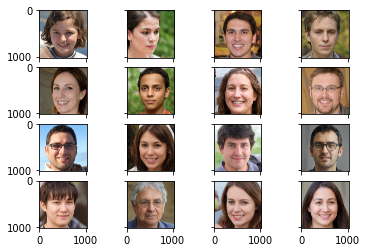

In [31]:
show_batch(collection)